In [0]:
import tensorflow as tf
import keras
import numpy as np

import matplotlib.pyplot as plt

In [0]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions #importamos el modelo entrenado IncptionV#
from keras import backend as K
from keras.preprocessing import image

In [4]:
iv3 = InceptionV3()

W0622 21:24:56.725071 140299192190848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0622 21:24:56.771917 140299192190848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0622 21:24:56.783131 140299192190848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0622 21:24:56.830897 140299192190848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0622 21:24:56.832304 1402991921

96116736/96112376 [==============================] - 3s 0us/step


In [6]:
print(iv3.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [7]:
#cargamos el archivo a la goog colab
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [37]:
#cargamos la variable en forma de array
x = image.img_to_array(image.load_img('gato.jpg', target_size=(299, 299))) #cargamos y acondicionamos a una escala de (299, 299)

print(x.shape)

#ahora normalizamos los datos del intervalo (0, 255) al intervalo (-1, 1)
x /= 255
x -= 0.5
x *= 2

(299, 299, 3)


In [38]:
#como la red neuronal nos va a pedir 4 dimensiones de entrada, a x le agregamos una dimension mas
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

print(x.shape)

(1, 299, 299, 3)


In [10]:
#ahora le pedimos a la red neuronal que nos clasifique nuestra variable x
y = iv3.predict(x)

y.shape #vemos el tama;o del vector resultante

(1, 1000)

In [11]:
#vemos el resultado de nuestra prediccion
decode_predictions(y)

40960/35363 [==================================] - 0s 0us/step


[[('n02123597', 'Siamese_cat', 0.30761287),
  ('n02124075', 'Egyptian_cat', 0.2837899),
  ('n02127052', 'lynx', 0.09708919),
  ('n02125311', 'cougar', 0.065857396),
  ('n04370456', 'sweatshirt', 0.007417207)]]

In [13]:
#ahora probamos con la cerveza
c = image.img_to_array(image.load_img('beer.jpg', target_size=(299, 299)))

#ahora normalizamos los datos del intervalo (0, 255) al intervalo (-1, 1)
c /= 255
c -= 0.5
c *= 2

c = c.reshape([1, c.shape[0], c.shape[1], c.shape[2]])

#ahora le pedimos a la red neuronal que nos clasifique nuestra variable c
yc = iv3.predict(c)

#yc.shape #vemos el tama;o del vector resultante

decode_predictions(yc)

[[('n02823750', 'beer_glass', 0.9975949),
  ('n02823428', 'beer_bottle', 0.0002613251),
  ('n03026506', 'Christmas_stocking', 0.00021410394),
  ('n07584110', 'consomme', 6.943e-05),
  ('n02815834', 'beaker', 4.8093723e-05)]]

ATAQUE ADVERSARIO

Un tipo de datos de entrada que hace que la red neuronal se confunda y prediga una clase fuera de la habitual

Lo que hace curioso es que este tipo de ataques es inperceptibles al ojo humano

El proceso para generar una imagen adversaria se asemeja mucho al proceso de aprendizaje de una red neuronal se busca es optimizar los parametros de la imagen de entrada para que arroje un resultado diferente al habitual;

En vez de intentar minimizar el error en la red lo que haremos es maximizar los parametros(pixeles) de la imagen de entrada para que se acerque a la clasificacion que queremos maximizar

Lo que haremos es redifinir el grafo de capas, lo que haremos es representar el grafo y con ello vamos a trabajar, capa de entrada y capa de salida

In [20]:
#seleccionamos las capas de inicial y final de iv3
inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

print("""Primera Capa
{}
Ultima Capa
{}""".format(inp_layer,out_layer))

Primera Capa
Tensor("input_1:0", shape=(?, 299, 299, 3), dtype=float32)
Ultima Capa
Tensor("predictions/Softmax:0", shape=(?, 1000), dtype=float32)


In [0]:
#trataremos de que iv3 clasifique al gato como limon, la cual es la clase 951
target_class = 951

#creamos una funcion de costo que maximice la clase 951
loss = out_layer[0, target_class]

#creamos nuestro gradiente
#pero en este caso no vamos a utilizar el gradiente sobre los parametrs, sino sobre la variable de entrada
grad = K.gradients(loss, inp_layer)[0]

#creamos una funcion que nos devuelva los valores del gradiente necesarios
optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss]) #hay que aclararle a k.function que estamos en la fase de entrenaiento (k.learn...)

In [27]:
#ahora creamos el bucle iterativo donde vamos a ejecutar este codigo
adv = np.copy(x) 
cost = 0.0

while cost < 0.95:
  gr, cost = optimize_gradient([adv, 0])
  adv += gr
  print("Lemon cost:", cost)

Lemon cost: 0.00023374626
Lemon cost: 0.00023533023
Lemon cost: 0.00023691432
Lemon cost: 0.00023849288
Lemon cost: 0.00024008764
Lemon cost: 0.00024170996
Lemon cost: 0.00024335133
Lemon cost: 0.0002450153
Lemon cost: 0.00024669166
Lemon cost: 0.00024838457
Lemon cost: 0.00025008564
Lemon cost: 0.0002517941
Lemon cost: 0.00025351308
Lemon cost: 0.00025526312
Lemon cost: 0.00025702754
Lemon cost: 0.00025880517
Lemon cost: 0.0002605894
Lemon cost: 0.0002623829
Lemon cost: 0.00026419462
Lemon cost: 0.0002660261
Lemon cost: 0.00026787145
Lemon cost: 0.00026975252
Lemon cost: 0.0002716384
Lemon cost: 0.00027352062
Lemon cost: 0.00027540536
Lemon cost: 0.00027729722
Lemon cost: 0.0002792057
Lemon cost: 0.0002811429
Lemon cost: 0.00028310882
Lemon cost: 0.00028510814
Lemon cost: 0.00028711505
Lemon cost: 0.0002891362
Lemon cost: 0.00029117815
Lemon cost: 0.00029325267
Lemon cost: 0.000295351
Lemon cost: 0.00029746778
Lemon cost: 0.00029961104
Lemon cost: 0.0003017851
Lemon cost: 0.0003039893

In [0]:
#ahora para visualizar la imagen modificada
#primero revertimos la normalizacion 
adv /= 2
adv += 0.5
adv *= 255

W0622 22:46:54.506904 140299192190848 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


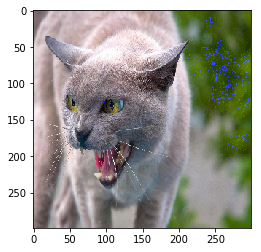

In [29]:
#visualizamos
plt.imshow(adv[0].astype(np.uint0)) #convertimos de tipo float a int
plt.show()

In [42]:
#ahora definiremos margenes de modificacion, de manera a que la perturbacion de la imagen sea minima
adv1 = np.copy(x)

pert = 0.01

max_pert = adv1 + 0.01
min_pert = adv1 - 0.01

cost = 0.0
gr = 0.0
while cost < 0.95:
  gr, cost = optimize_gradient([adv1, 0])
  adv1 += gr
  
  adv1 = np.clip(adv1, min_pert, max_pert) #recortamos la imagen en el intervalor max_pert, min_pert
  adv1 = np.clip(adv1, -1, 1)
  
  print("Lemon cost:", cost)

Lemon cost: 0.00023374626
Lemon cost: 0.0002353253
Lemon cost: 0.00023690435
Lemon cost: 0.00023847625
Lemon cost: 0.00024006708
Lemon cost: 0.00024168419
Lemon cost: 0.00024331937
Lemon cost: 0.00024497707
Lemon cost: 0.00024664684
Lemon cost: 0.00024833425
Lemon cost: 0.00025003144
Lemon cost: 0.00025173445
Lemon cost: 0.000253447
Lemon cost: 0.00025519176
Lemon cost: 0.00025695015
Lemon cost: 0.00025872266
Lemon cost: 0.00026049945
Lemon cost: 0.0002622885
Lemon cost: 0.00026408868
Lemon cost: 0.0002659192
Lemon cost: 0.00026775498
Lemon cost: 0.00026962897
Lemon cost: 0.00027151708
Lemon cost: 0.00027339382
Lemon cost: 0.00027526866
Lemon cost: 0.00027715034
Lemon cost: 0.00027905605
Lemon cost: 0.00028099047
Lemon cost: 0.0002829494
Lemon cost: 0.00028494126
Lemon cost: 0.00028694374
Lemon cost: 0.00028895622
Lemon cost: 0.00029099407
Lemon cost: 0.00029305983
Lemon cost: 0.00029515004
Lemon cost: 0.00029725258
Lemon cost: 0.00029938185
Lemon cost: 0.0003015457
Lemon cost: 0.00030

In [0]:
adv1 /= 2
adv1 += 0.5
adv1 *= 255

In [0]:
ccc = np.copy(x)

ccc /= 2
ccc += 0.5
ccc *= 255

W0622 23:27:03.521030 140299192190848 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


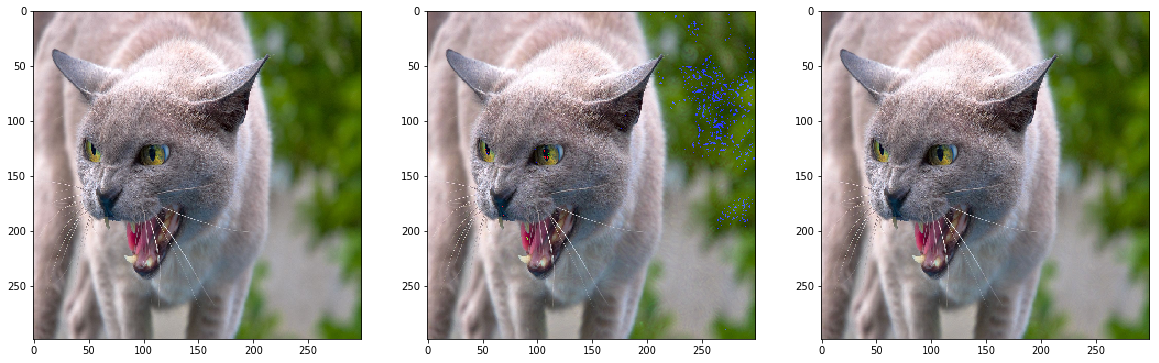

In [47]:
plt.figure(figsize = (20,20))
plt.figure(1)
plt.subplot(131)
plt.imshow(ccc[0].astype(np.uint0))

plt.subplot(132)
plt.imshow(adv[0].astype(np.uint0)) #convertimos de tipo float a int

plt.subplot(133)
plt.imshow(adv1[0].astype(np.uint0))

plt.show()

In [51]:
#ahora normalizamos los datos del intervalo (0, 255) al intervalo (-1, 1)
ppp = np.copy(adv1)
ppp /= 255
ppp -= 0.5
ppp *= 2

ppp = ppp.reshape([1, ppp.shape[1], ppp.shape[2], ppp.shape[3]])

ppp.shape


(1, 299, 299, 3)

In [52]:
#ahora le pedimos a la red neuronal que nos clasifique nuestra variable c
yppp = iv3.predict(ppp)

#yc.shape #vemos el tama;o del vector resultante

decode_predictions(yppp)

[[('n07749582', 'lemon', 0.9964438),
  ('n07747607', 'orange', 0.001381248),
  ('n07742313', 'Granny_Smith', 0.00063067634),
  ('n09229709', 'bubble', 0.00010220904),
  ('n03958227', 'plastic_bag', 7.1982475e-05)]]